In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
# Path to dataset
folder_dir = r'C:\Users\shaur\Downloads\Unpaired-Medical-Image-Translation-and-Brain-Tumor-Detection-main\Unpaired-Medical-Image-Translation-and-Brain-Tumor-Detection-main\Dataset\brain_tumor_dataset\train'

In [3]:
tumor_detection_yes = os.path.join(folder_dir, "yes")
tumor_detection_no = os.path.join(folder_dir, "no")

In [4]:
len(os.listdir(tumor_detection_no))

84

In [5]:
from tqdm import tqdm

def load_data_and_labels(folder, label):
    data = []
    labels = []
    path = folder

    for file_name in tqdm(os.listdir(path)):
        img_path = os.path.join(path, file_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (50, 50), interpolation=cv2.INTER_AREA)
        img = img / 255.0  
        data.append(img)
        labels.append(label)

    return data, labels


yes_data, yes_labels = load_data_and_labels(tumor_detection_yes, 1)
no_data, no_labels = load_data_and_labels(tumor_detection_no, 0)

100%|██████████| 84/84 [00:00<00:00, 260.91it/s]


Text(0.5, 1.0, 'no')

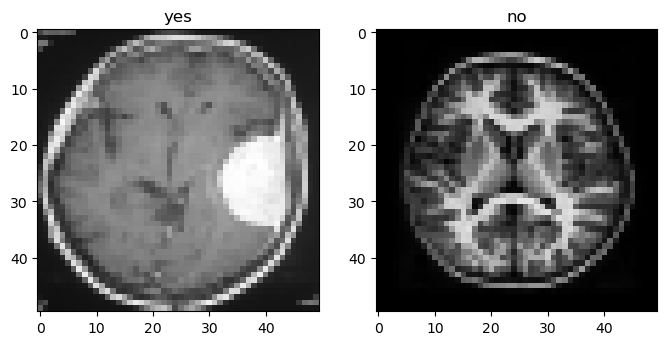

In [6]:
g, ax = plt.subplots(1, 2, figsize = (8,4))\

ax[0].imshow(yes_data[5])
ax[0].set_title("yes")

ax[1].imshow(no_data[5])
ax[1].set_title("no")

In [7]:
from sklearn.model_selection import train_test_split


X_train_yes, X_test_yes, y_train_yes, y_test_yes = train_test_split(yes_data, yes_labels, test_size=0.2, random_state=42)


X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(no_data, no_labels, test_size=0.2, random_state=42)


X_train = np.array(X_train_yes + X_train_no)
X_test = np.array(X_test_yes + X_test_no)
y_train = np.array(y_train_yes + y_train_no)
y_test = np.array(y_test_yes + y_test_no)


print("Shape X_train:", X_train.shape)
print("Shape y_train:", y_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (172, 50, 50, 3)
Shape y_train: (172,)
Shape X_test: (44, 50, 50, 3)
Shape y_test: (44,)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [9]:
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

In [11]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(256, activation="relu"))
model.add(Dense(14, activation="softmax"))

C:\Users\shaur\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
model.fit(X_train, y_train, epochs=70, validation_split=0.1)

Epoch 1/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.4145 - loss: 1.4617 - val_accuracy: 0.0000e+00 - val_loss: 3.2209
Epoch 2/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6582 - loss: 1.0733 - val_accuracy: 0.8333 - val_loss: 0.4074
Epoch 3/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7072 - loss: 0.5722 - val_accuracy: 0.5000 - val_loss: 1.1572
Epoch 4/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7914 - loss: 0.4981 - val_accuracy: 0.5000 - val_loss: 1.0297
Epoch 5/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8170 - loss: 0.3984 - val_accuracy: 0.7778 - val_loss: 0.5303
Epoch 6/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8842 - loss: 0.3047 - val_accuracy: 0.6667 - val_loss: 0.8347
Epoch 7/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9375 - loss: 0.2431 - val_accuracy: 0.7222 - val_loss: 0.7982
Epoch 8/70
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9480 - loss: 0.1993 - val_accuracy: 0.8333 - val_loss: 0.

In [14]:
model.save(r"C:\Users\shaur\Tumor+CycleGan\tumor.h5")

In [15]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [16]:
prediction = np.argmax(y_pred, axis =1)
prediction

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

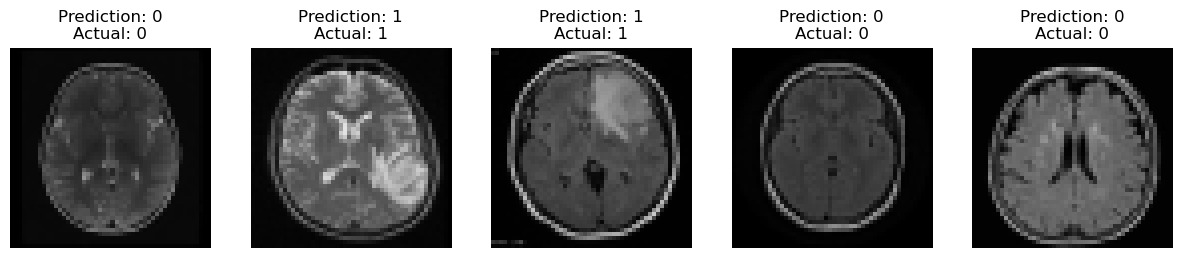

In [17]:
import matplotlib.pyplot as plt

# Function to display MRI images with predictions
def display_images_with_predictions(images, predictions, true_labels):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f"Prediction: {predictions[i]}\nActual: {true_labels[i]}")
        plt.axis("off")
    plt.show()

# Select a few images from the test set
num_display = 5
sample_indices = np.random.choice(len(X_test), num_display, replace=False)

# Display selected images with predictions
display_images_with_predictions(X_test[sample_indices], prediction[sample_indices], y_test[sample_indices])

In [18]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(prediction, y_test))
print("Accuracy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.81      0.85      0.83        26

    accuracy                           0.80        44
   macro avg       0.79      0.78      0.79        44
weighted avg       0.79      0.80      0.79        44

Accuracy:  0.7954545454545454


In [19]:
def read_and_predict_image(image_path, model):
    # Read and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (50, 50), interpolation=cv2.INTER_AREA)
    img = img / 255.0  # Normalization

    # Reshape the image to match the model's expected input shape
    img = np.reshape(img, (1, 50, 50, 3))

    # Make a prediction
    prediction = model.predict(img)

    # Get the predicted class
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Display the image and prediction result
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {'Yes' if predicted_class == 1 else 'No'}")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


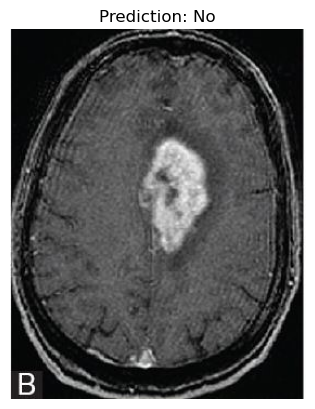

In [20]:
ground_truth = r"C:\Users\shaur\Tumor+CycleGan\Dataset\brain_tumor_dataset\test\yes\Y192.JPG"
read_and_predict_image(ground_truth, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


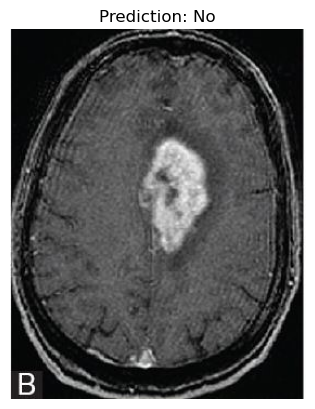

In [21]:
gt2 = r"C:\Users\shaur\Tumor+CycleGan\Dataset\brain_tumor_dataset\test\no\No13.jpg"
read_and_predict_image(ground_truth, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


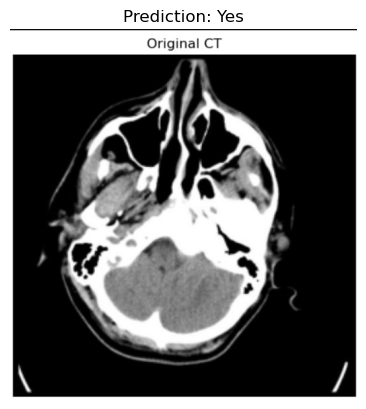

In [25]:
# Original image
og1 = r"C:\Users\shaur\Tumor+CycleGan\og1.jpg"
read_and_predict_image(og1, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


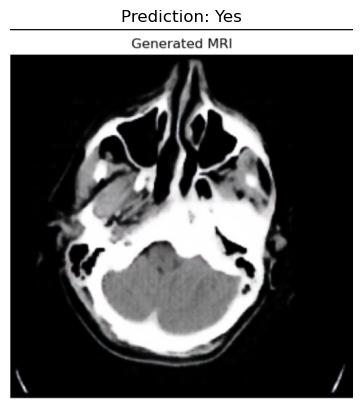

In [26]:
# Generated Image
og1 = r"C:\Users\shaur\Tumor+CycleGan\Gen1.jpg"
read_and_predict_image(og1, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


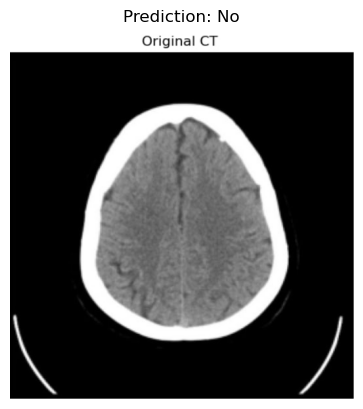

In [29]:
# Original image
og2 = r"C:\Users\shaur\Tumor+CycleGan\Og2.jpg"
read_and_predict_image(og2, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


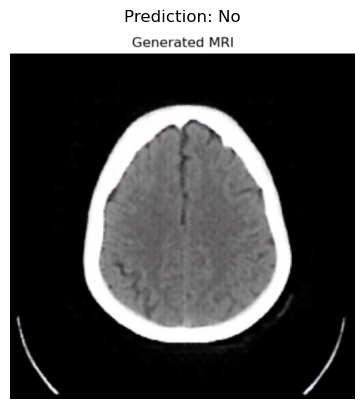

In [30]:
# Geneated Image
gen2 = r"C:\Users\shaur\Tumor+CycleGan\Gen2.jpg"
read_and_predict_image(gen2, model)